In [23]:
import main_file as mf
import importlib
importlib.reload(mf)
from main_file import *
import pydeck as pdk
import matplotlib.pyplot as plt

In [24]:
df_geo = mf.df[mf.df["consolidated_is_lon_lat_correct"]==True]
df_geo = df_geo[["consolidated_longitude","consolidated_latitude"]].dropna()

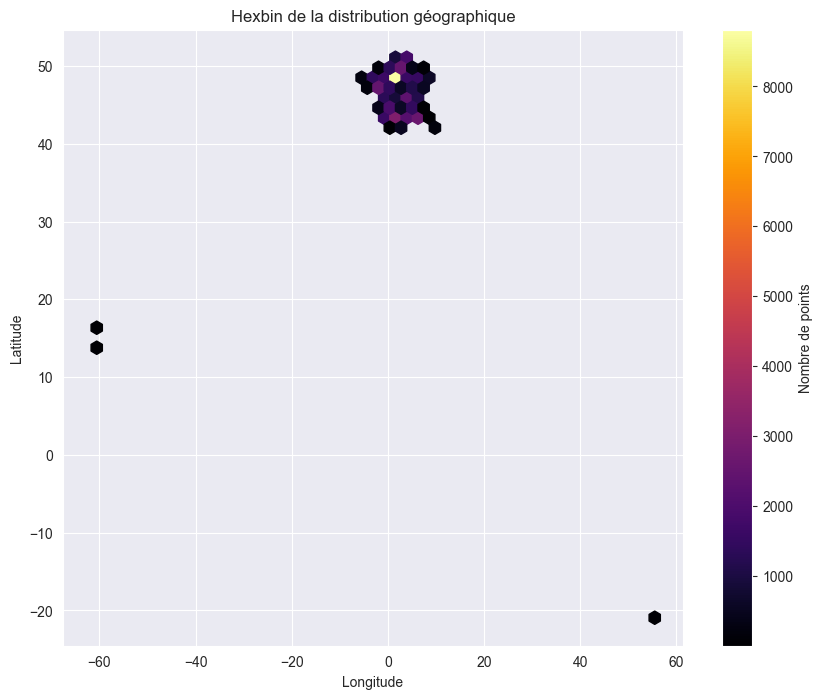

In [25]:
# Extraction des coordonnées
x = df_geo["consolidated_longitude"]
y = df_geo["consolidated_latitude"]

# Création du graphique hexbin avec Matplotlib
plt.figure(figsize=(10, 8))
hb = plt.hexbin(x, y, gridsize=50, cmap='inferno', mincnt=1)
cb = plt.colorbar(hb, label='Nombre de points')

# Personnalisation de la carte
plt.title("Hexbin de la distribution géographique")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [ ]:
# import plotly.express as px
# # Utilisation de Plotly pour la carte de densité
# fig = px.density_mapbox(df_geo, lat='consolidated_latitude', lon='consolidated_longitude',
#                         radius=10, center=dict(lat=45.476584, lon=2.476711), zoom=5.2,
#                         mapbox_style="carto-positron")
# 
# fig.update_layout(title="Distribution géographique avec des hexagones")
# fig.show()

# le graphe avec plotly n'est pas beau

In [26]:
layer = pdk.Layer(
    "HexagonLayer",
    df_geo,
    get_position=["consolidated_longitude", "consolidated_latitude"],
    auto_highlight=True,
    elevation_scale=50,
    pickable=True,
    elevation_range=[0, 3000],
    extruded=True,
    coverage=1,
)

# Set the viewport location
view_state = pdk.ViewState(
    longitude=2.476711,
    latitude=45.476584,
    zoom=5.2,
    min_zoom=5.2,
    max_zoom=17,
    pitch=40.5,
    bearing=4.36,
)
# Render
r = pdk.Deck(layers=[layer], initial_view_state=view_state)
r.to_html("img/5_geo.html")

In [27]:
dfv = mf.df.groupby(["nom_departement","mis_en_service_cette_annee"], as_index=False)\
  ["id_pdc_itinerance"]\
  .count()

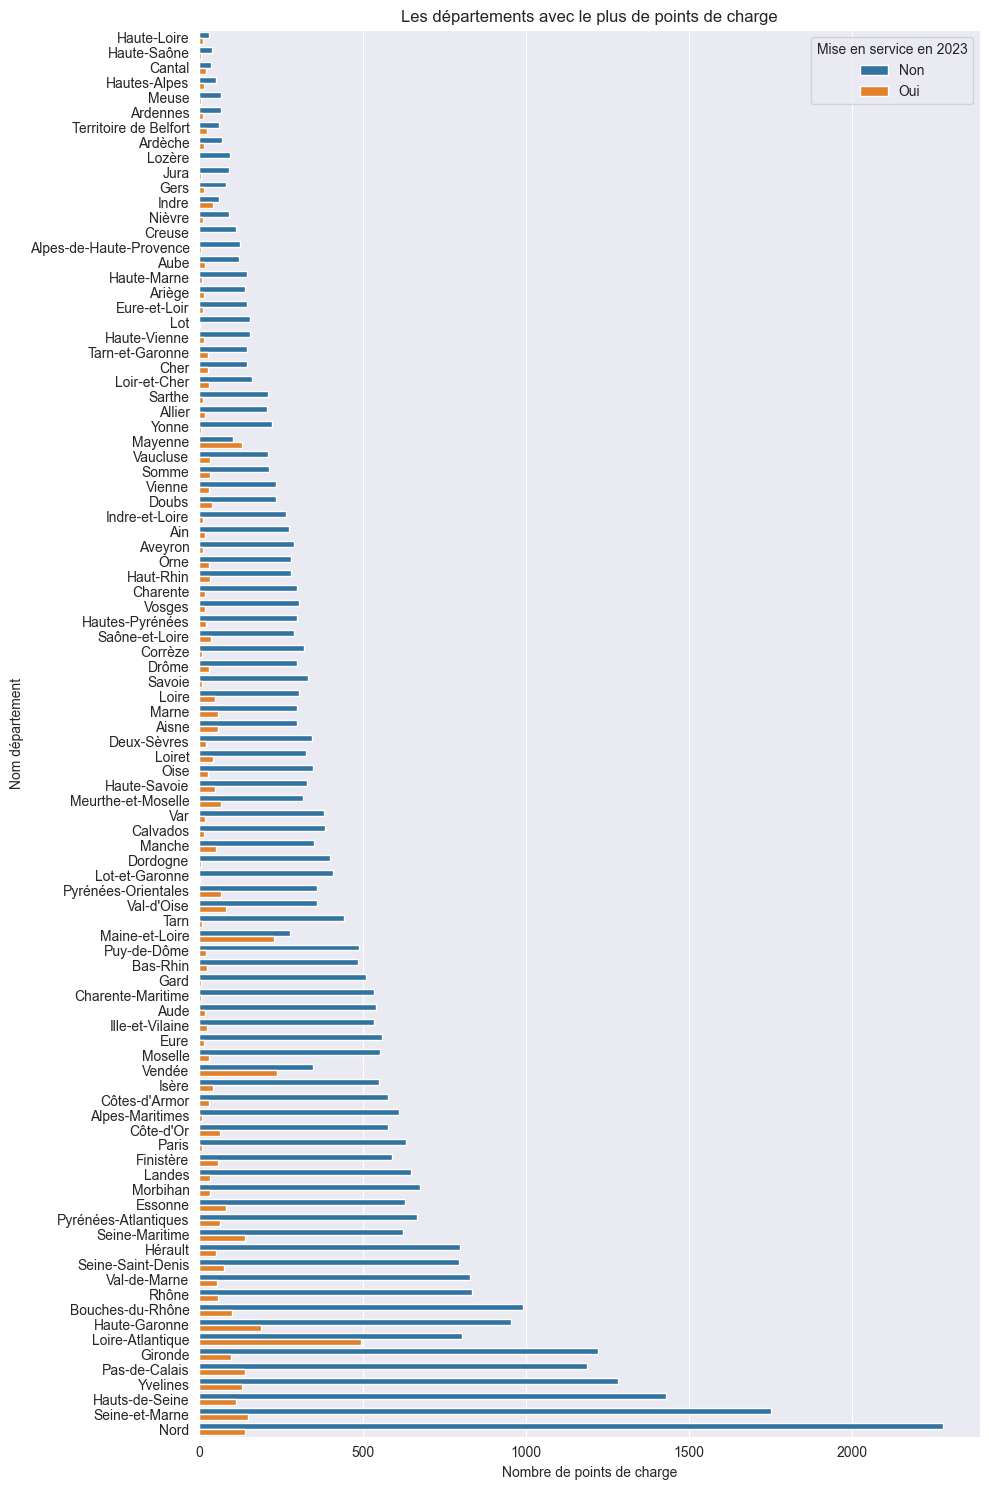

In [28]:
plt.figure(figsize=(10, 15))

# Création du graphique à barres horizontales avec Seaborn
sns.barplot(
    data=dfv,
    x="id_pdc_itinerance",
    y="nom_departement",
    hue="mis_en_service_cette_annee",
    palette="tab10",
    order=dfv.groupby('nom_departement')['id_pdc_itinerance'].sum().sort_values().index
)

# Personnalisation du graphique
plt.title("Les départements avec le plus de points de charge")
plt.xlabel("Nombre de points de charge")
plt.ylabel("Nom département")
plt.legend(title="Mise en service en 2023")

# Mise à jour de la disposition du graphique
plt.tight_layout()
plt.show()

In [29]:

dfv = mf.df.groupby(["nom_region","nom_departement","mis_en_service_cette_annee"], as_index=False)\
  ["id_pdc_itinerance"]\
  .count()

dfv["mis_en_service_cette_annee"] = dfv["mis_en_service_cette_annee"].map({"Oui": "+","Non":"  "})


In [30]:

cs = px.colors.qualitative.T10[::-1].copy()
cs[2] = "#AAAAAA"
fig = px.treemap(dfv
        ,path=[ 'nom_region', 'nom_departement', 'mis_en_service_cette_annee']
        ,values='id_pdc_itinerance'
        ,height=700
        ,color="mis_en_service_cette_annee"
        ,color_discrete_sequence=cs
        ,title="Nombre de points de charge par région et département. <br><sup>Le '+' montre si l'infrastructure a été déployé en 2024</sup>"
    )
fig.update_coloraxes(showscale=True)

fig.update_layout(
    font_family="Raleway"
)